In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import pandas as pd

In [10]:
with open('all-output.pickle', 'rb') as f:
    data = pickle.load(f)

In [11]:
loss_dict = data['train_val_loss']

In [12]:
data.keys()

dict_keys(['train_val_loss', 'args', 'test_loss'])

In [13]:
data['test_loss']

{'theta': 0.0876926892142583,
 'phi': 0.08749725637294015,
 'shape': 0.056888408343947955,
 'texture': 0.04235124588400747}

In [14]:
np.mean([data['test_loss']['theta'], data['test_loss']['phi']])

0.08759497279359922

In [15]:
np.mean([0.1086513, 0.0604855])

0.0845684

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


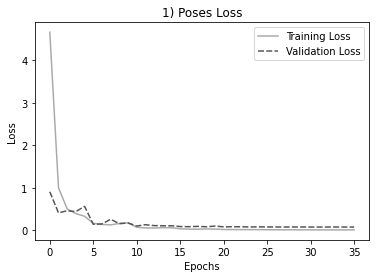

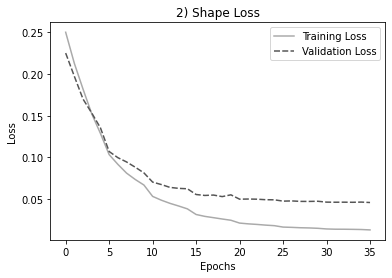

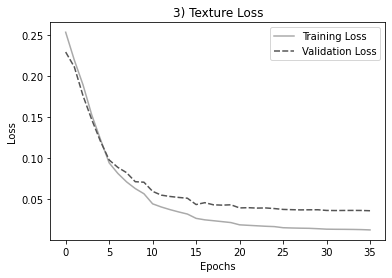

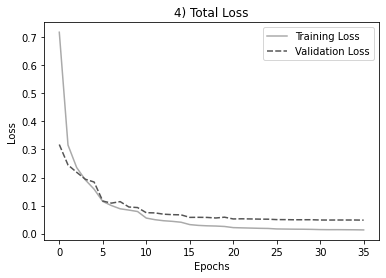

In [16]:
count = 1
for loss_type in ['poses', 'shape', 'texture', 'total']:
    loss = {'train': [], 'val': []}
    for phase in ['train', 'val']:
        for item in loss_dict[phase]:
            loss[phase].append(item[loss_type])
    plt.figure(figsize=(6, 4))
    data = pd.DataFrame(loss)
    sns.lineplot(data=data, palette='binary')
    plt.title(f'{count}) {loss_type.title()} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
#     plt.savefig(f'graphs/with-background/{"all"}-{loss_type}-loss.eps', bbox_inches='tight')
    plt.savefig(f'graphs/{"all"}-{loss_type}-loss.eps', bbox_inches='tight')
    count += 1